In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression

In [2]:
# Load the dataset
Glassdata = pd.read_csv(r'C:\Users\ENVY\OneDrive\Documents\Glass Identification.csv')

In [3]:
Glassdata.head()

,Id number,RI,NA,MG,AL,SI,K,CA,BA,FE,TYPE
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
Glassdata.info()
Glassdata.isna().sum()
Glassdata.shape
Glassdata.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id number  214 non-null    int64  
 1   RI         214 non-null    float64
 2   NA         214 non-null    float64
 3   MG         214 non-null    float64
 4   AL         214 non-null    float64
 5   SI         214 non-null    float64
 6   K          214 non-null    float64
 7   CA         214 non-null    float64
 8   BA         214 non-null    float64
 9   FE         214 non-null    float64
 10  TYPE       214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


Index(['Id number', 'RI', 'NA', 'MG', 'AL', 'SI', 'K', 'CA', 'BA', 'FE',
       'TYPE'],
      dtype='object')

In [5]:
Glassdata.describe()

,Id number,RI,NA,MG,AL,SI,K,CA,BA,FE,TYPE
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
# Define glass types
TYPES = {
    1: 'building_windows_float_processed',
    2: 'building_windows_non_float_processed',
    3: 'vehicle_windows_float_processed',
    4: 'vehicle_windows_non_float_processed',
    5: 'containers',
    6: 'tableware',
    7: 'headlamps'
}

In [7]:
# Define the mapping of glass types to window or non-window
glass_type_mapping = {1: 'Window', 2: 'Window', 3: 'Window', 4: 'Window', 5: 'Non-Window', 6: 'Non-Window', 7: 'Non-Window'}
Glassdata['Window_Type'] = Glassdata['TYPE'].map(glass_type_mapping)

In [8]:
Glassdata['Window_Type']

0          Window
1          Window
2          Window
3          Window
4          Window
          ...    
209    Non-Window
210    Non-Window
211    Non-Window
212    Non-Window
213    Non-Window
Name: Window_Type, Length: 214, dtype: object

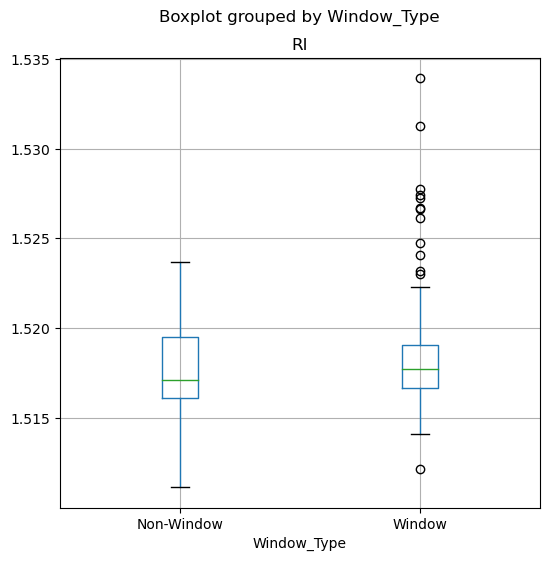

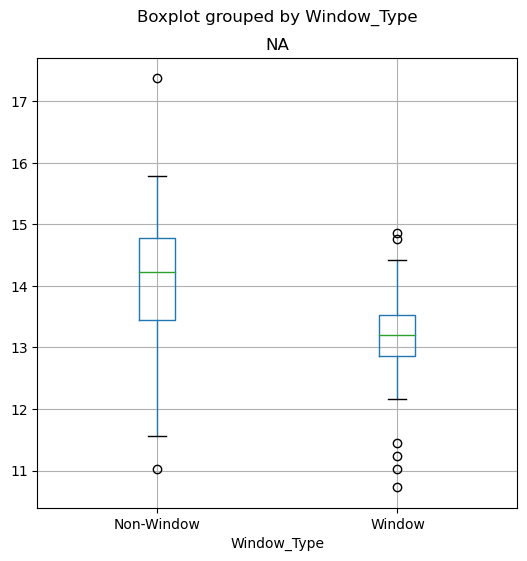

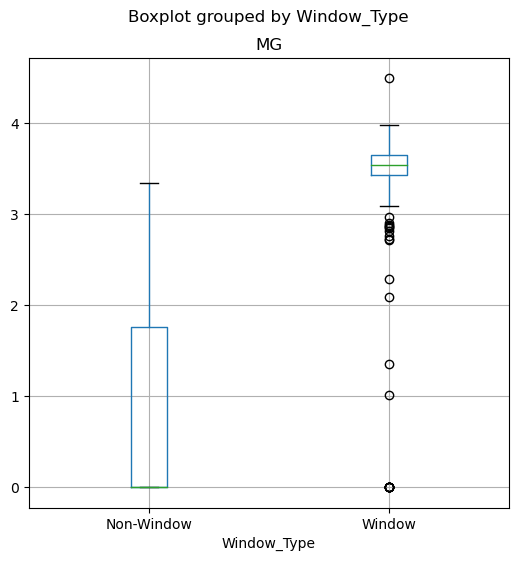

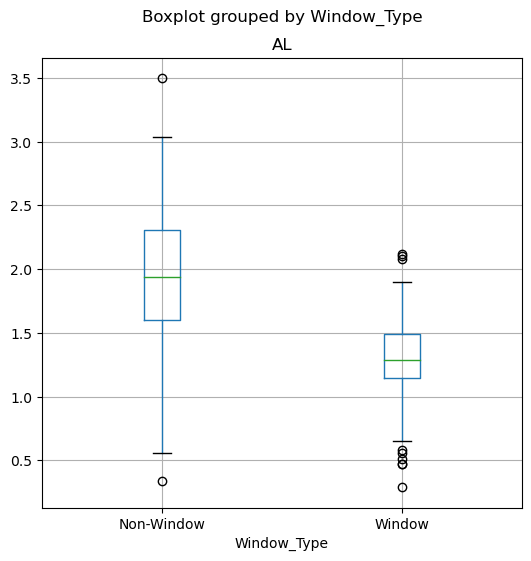

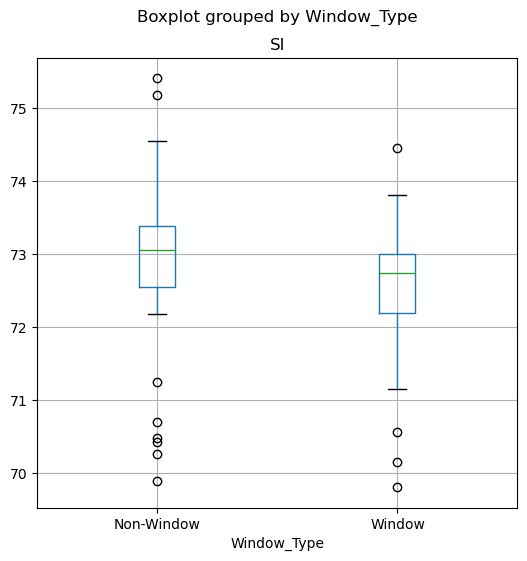

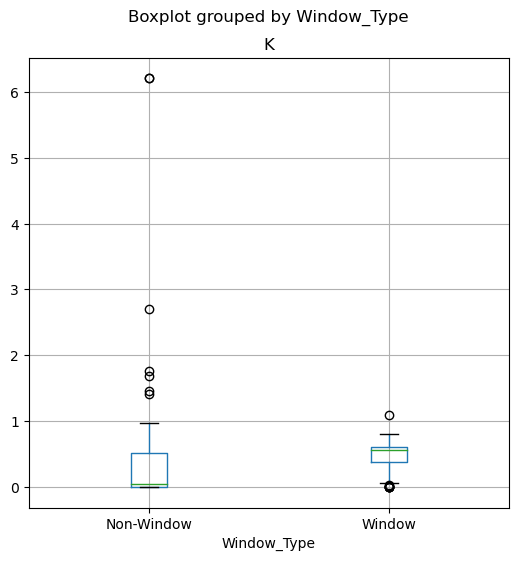

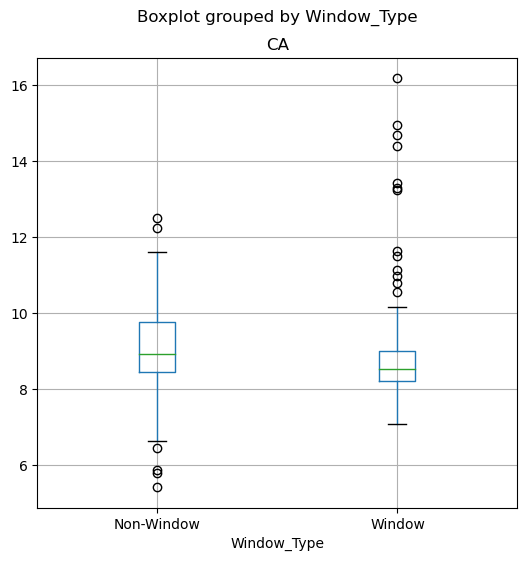

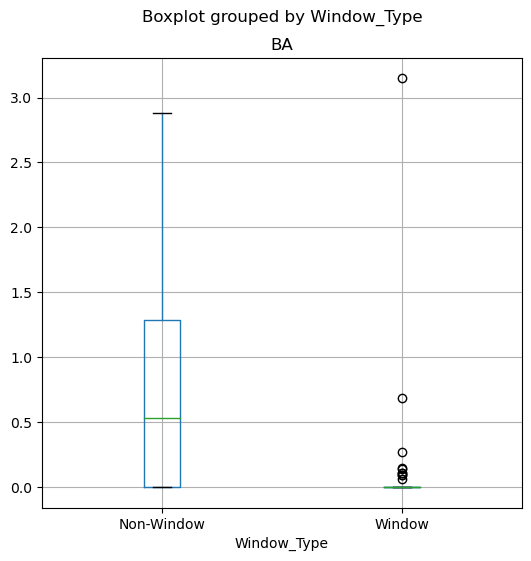

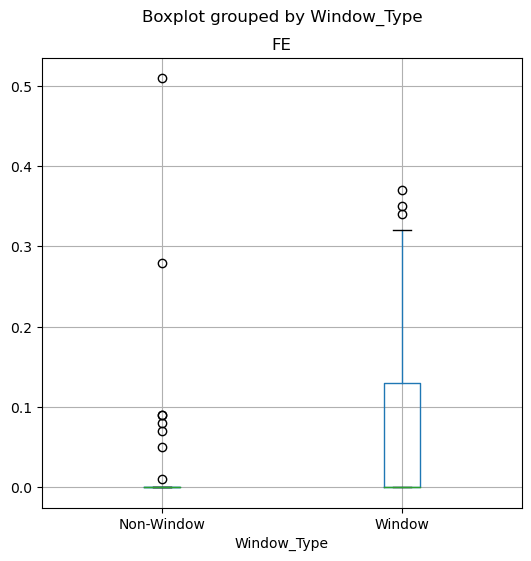

In [9]:
# Display boxplots
features = ['RI', 'NA', 'MG', 'AL', 'SI', 'K', 'CA', 'BA', 'FE']
for col in features:
    Glassdata.boxplot(column=col, by='Window_Type', figsize=(6, 6))
    plt.title(col)
plt.show()

In [10]:
# Define the features and label
features = ['RI', 'NA', 'MG', 'AL', 'SI', 'K', 'CA', 'BA', 'FE']
label = 'TYPE'

X, y = Glassdata[features].values, Glassdata[label].values

In [11]:
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Define the Column Transformer for feature scaling
feat_cols = [0, 1, 2, 3, 4, 5, 6, 7, 8]
feature_transformer = Pipeline(steps=[('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('preprocess', feature_transformer, feat_cols)])

# Different classifiers
classifiers = [
    LogisticRegression(C=1/0.01, solver='saga', multi_class='auto', max_iter=800),
    SVC(probability=True),
    RandomForestClassifier(n_estimators=100),
    KNeighborsClassifier(n_neighbors=5),
    DecisionTreeClassifier(max_features='auto'),
    GradientBoostingClassifier(max_features='auto')
]

In [12]:
# Fit different classifiers and evaluate performance
for clf in classifiers:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('clf', clf)])
    model = pipeline.fit(xtrain, ytrain)
    ympred = model.predict(xtest)
    
    # Print classifier details
    print(f"\n{clf.__class__.__name__}:")

C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



LogisticRegression:

SVC:

RandomForestClassifier:

KNeighborsClassifier:

DecisionTreeClassifier:


C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ENVY\anac


GradientBoostingClassifier:


C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ENVY\anacon

In [13]:
# Classification Report
print(classification_report(ytest, ympred))

              precision    recall  f1-score   support

           1       0.81      0.81      0.81        21
           2       0.80      0.87      0.83        23
           3       0.50      0.20      0.29         5
           5       0.67      0.50      0.57         4
           6       1.00      1.00      1.00         3
           7       0.82      1.00      0.90         9

    accuracy                           0.80        65
   macro avg       0.77      0.73      0.73        65
weighted avg       0.78      0.80      0.78        65



In [14]:
classifiers=[]

svm = SVC(probability=True)
classifiers.append(svm)

rf = RandomForestClassifier(n_estimators=100)
classifiers.append(rf)

knn = KNeighborsClassifier(n_neighbors=5)
classifiers.append(knn)

dt = DecisionTreeClassifier(max_features='auto')
classifiers.append(dt)

gbc = GradientBoostingClassifier(max_features= 'auto')
classifiers.append(gbc
                  )
feat_cols = [1,2,3,4,5,6,7,8]
feature_transformer = Pipeline( steps = [('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers= [('preprocess', feature_transformer, feat_cols)])

for clf in classifiers:
    pipeline= Pipeline(steps=[ ('preprocessor', preprocessor), ('clf', clf) ])
    model=pipeline.fit(xtrain, ytrain)
    ympred= model.predict(xtest)
    print(clf)
    print("Overall Accuracy:",accuracy_score(ytest, ympred))
    print("Overall Precision:",precision_score(ytest, ympred, average='macro'))
    print("Overall Recall:",recall_score(ytest, ympred, average='macro'))
    print("\n")

C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC(probability=True)
Overall Accuracy: 0.676923076923077
Overall Precision: 0.6568670792808724
Overall Recall: 0.5153554175293306


RandomForestClassifier()
Overall Accuracy: 0.7692307692307693
Overall Precision: 0.6723232323232323
Overall Recall: 0.6550839659535311


KNeighborsClassifier()
Overall Accuracy: 0.7076923076923077
Overall Precision: 0.6549002849002848
Overall Recall: 0.5523924545663677


DecisionTreeClassifier(max_features='auto')
Overall Accuracy: 0.6615384615384615
Overall Precision: 0.7282252348041821
Overall Recall: 0.5899585921325052




C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ENVY\anac

GradientBoostingClassifier(max_features='auto')
Overall Accuracy: 0.7384615384615385
Overall Precision: 0.5239898989898989
Overall Recall: 0.5552449965493443




C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ENVY\anacon

In [15]:
# Overall Accuracy, Precision, and Recall
print("Overall Accuracy:", accuracy_score(ytest, ympred))
print("Overall Precision:", precision_score(ytest, ympred, average='macro'))
print("Overall Recall:", recall_score(ytest, ympred, average='macro'))

Overall Accuracy: 0.7384615384615385
Overall Precision: 0.5239898989898989
Overall Recall: 0.5552449965493443


C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
 # Confusion Matrix
mcm = confusion_matrix(ytest, ympred)
print("Confusion Matrix:")
print(mcm)

Confusion Matrix:
[[16  3  2  0  0  0]
 [ 1 20  0  1  0  1]
 [ 4  0  1  0  0  0]
 [ 0  1  0  2  0  1]
 [ 1  0  0  1  0  1]
 [ 0  0  0  0  0  9]]


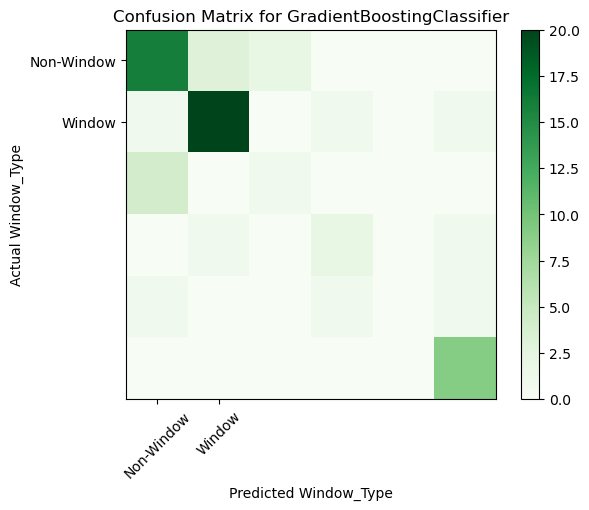

In [17]:
# Visualize the Confusion Matrix based on Window_Type
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Greens)
plt.colorbar()

# Use unique values from Window_Type instead of 'y'
unique_window_types = np.unique(Glassdata['Window_Type'])
tick_marks = np.arange(len(unique_window_types))

plt.xticks(tick_marks, unique_window_types, rotation=45)
plt.yticks(tick_marks, unique_window_types)
plt.xlabel("Predicted Window_Type")
plt.ylabel("Actual Window_Type")
plt.title(f"Confusion Matrix for {clf.__class__.__name__}")
plt.show()

In [ ]:
# To predict glass types with new data. Assuming 'new_data' is your new dataset with the same features as the training data

# Assuming 'new_data' is your new dataset with the same features as the training data
new_data = ...

# Ensure 'features' includes all relevant features
features = ['RI', 'NA', 'MG', 'AL', 'SI', 'K', 'CA', 'BA', 'FE']

# Apply the same preprocessing steps
x_new = preprocessor.transform(new_data[features])

# Make predictions using the trained model
predictions = model.predict(x_new)

# Display the predicted glass types
print("Predicted Glass Types:")
print(predictions)